In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pune_weather = pd.read_csv("datasets/pune_temp.csv")
global_weather = pd.read_csv("datasets/global_temp.csv")

In [3]:
pune_weather.head()

,year,avg_temp
0,1796,24.39
1,1797,25.17
2,1798,24.05
3,1799,24.68
4,1800,24.67


In [4]:
global_weather.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [5]:
pune_weather = pune_weather.merge(pune_weather.rolling(10, on="year").mean(), on="year")
global_weather = global_weather.merge(global_weather.rolling(10, on="year").mean(), on="year")

In [6]:
global_weather.head(15)

,year,avg_temp_x,avg_temp_y
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.030


In [24]:
rename_dict = {"avg_temp_x": "avg_temp",
               "avg_temp_y": "moving_average"}

font_dict = {'fontsize': 15}

In [8]:
pune_weather.rename(columns=rename_dict, inplace=True)
global_weather.rename(columns=rename_dict, inplace=True)

In [9]:
global_weather.head(10)

,year,avg_temp,moving_average
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.03


Text(0.06,0.5,'Temperature [°C]')

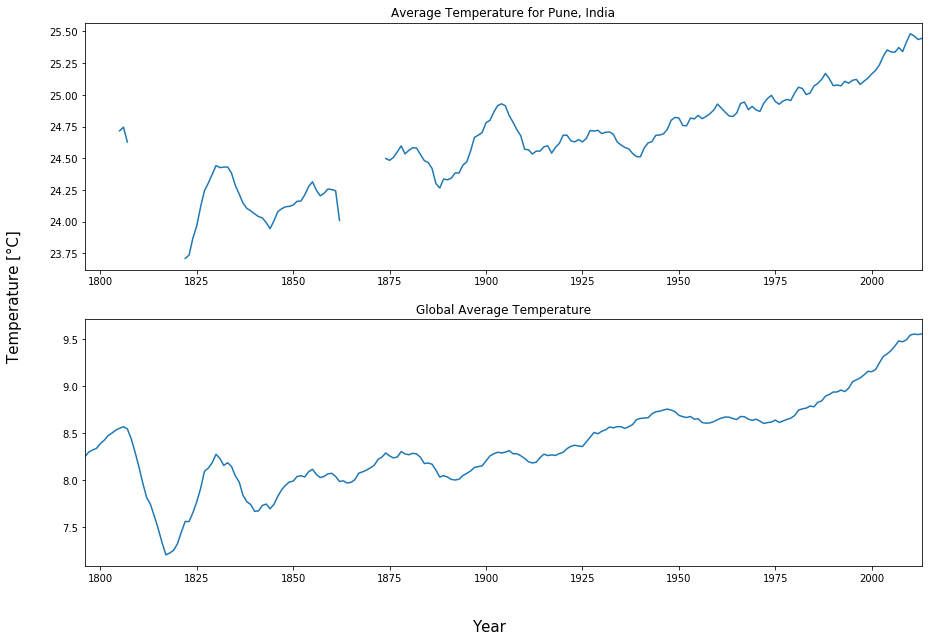

In [25]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.xlim(1796, 2013)
plt.title("Average Temperature for Pune, India")
plt.plot(pune_weather.year, pune_weather.moving_average)

plt.subplot(2,1,2)
plt.xlim(1796, 2013)
plt.title("Global Average Temperature")
plt.plot(global_weather.year, global_weather.moving_average)

fig.text(0.5, 0.04, 'Year', ha='center', va='center', fontdict=font_dict)
fig.text(0.06, 0.5, "Temperature [\U000000B0C]", ha='center', va='center', rotation='vertical', fontdict=font_dict)